In [101]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectPercentile
from sklearn.preprocessing import StandardScaler

In [102]:
data = pd.read_csv("../dataset/dataset.csv")

# sequencias do dataset de teste final
seq_test = [
    'BQSquare_416x240_60',
    'Flowervase_416x240_30',
    'tempete_cif',
    'waterfall_cif',
    'PartyScene_832x480_50',
    'aspen_480p_30f',
    'aspen_1080p',
    'into_tree_480p_30f',
    'in_to_tree_420_720p50',
    'in_to_tree_1080p50',
    'station2_480p25',
    'blue_sky_1080p25',
    'Netflix_DrivingPOV_1280x720_60fps_8bit_420_120f',
    'mobcal_720p_30f',
    'station2_1080p25'
]

# sequencias que não devem ser usadas
seq_drop = [
    'crowd_run_1080p50'  # duplicada
]

data_test = data[data.name.isin(seq_test)]
data_train = data[~data.name.isin(seq_test)]

In [103]:
data_test

,name,distance,num_ref_frames,cq_level,cur_ref_count,cur_order_hint,cur_showable_frame,ref_ref_count,ref_order_hint,ref_showable_frame,...,alpha,beta,gamma,delta,seg_count,ref_frame_error,fast_error,warp_error,selected,inliers_rate
760,aspen_1080p,1,8,80,1,8,0,2,16,0,...,-64.0,-320.0,320.0,-64.0,146,2812512,556671,425251,1,0.364478
761,aspen_1080p,1,8,80,1,8,0,8,0,0,...,-128.0,-384.0,384.0,-128.0,219,2059287,903052,647456,1,0.526379
762,aspen_1080p,1,4,80,1,4,0,2,16,0,...,0.0,-192.0,192.0,0.0,226,3338004,950619,684259,1,0.458474
763,aspen_1080p,1,4,80,1,4,0,7,0,0,...,64.0,-128.0,128.0,64.0,189,3155901,901339,702915,1,0.351010
764,aspen_1080p,1,2,80,1,2,0,2,16,0,...,-128.0,128.0,-128.0,-128.0,306,4476995,1372563,1092224,1,0.653757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21876,waterfall_cif,1,2,220,1,27,0,2,22,0,...,-192.0,0.0,0.0,-192.0,94,450296,672718,317259,0,0.968444
21877,waterfall_cif,1,1,220,1,26,0,2,16,0,...,128.0,0.0,0.0,128.0,98,449884,740724,316004,0,0.983458
21878,waterfall_cif,1,1,220,1,26,0,2,24,0,...,-128.0,0.0,0.0,-128.0,98,458475,738878,325659,0,0.981323
21879,waterfall_cif,1,1,220,1,28,0,2,16,0,...,128.0,0.0,0.0,128.0,95,428391,611321,303737,0,0.986203


In [104]:
data_train

,name,distance,num_ref_frames,cq_level,cur_ref_count,cur_order_hint,cur_showable_frame,ref_ref_count,ref_order_hint,ref_showable_frame,...,alpha,beta,gamma,delta,seg_count,ref_frame_error,fast_error,warp_error,selected,inliers_rate
0,720p50_parkrun_ter,1,3,80,1,3,0,7,0,0,...,64.0,-64.0,64.0,64.0,282,13583723,8002826,7070073,1,0.789596
1,720p50_parkrun_ter,1,1,80,1,2,0,5,0,0,...,0.0,-64.0,64.0,0.0,312,12353545,6013827,4249018,1,0.995848
2,720p50_parkrun_ter,1,1,80,1,4,0,2,12,0,...,0.0,0.0,0.0,0.0,340,13120077,8719772,4404826,1,0.993794
3,720p50_parkrun_ter,1,2,80,1,4,0,2,2,0,...,0.0,-64.0,64.0,0.0,331,15298827,8171097,6394827,1,0.962245
4,720p50_parkrun_ter,1,1,80,1,5,0,2,12,0,...,0.0,0.0,0.0,0.0,335,13184703,8545519,4495996,1,0.996654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22623,YachtRide_1920x1080_120fps_420_8bit_YUV,1,1,220,1,26,0,2,16,0,...,-128.0,64.0,-64.0,-128.0,138,1718698,1578452,1205863,0,0.270499
22624,YachtRide_1920x1080_120fps_420_8bit_YUV,1,1,220,1,26,0,2,24,0,...,0.0,-64.0,64.0,0.0,165,1986437,1785728,1395885,0,0.320349
22625,YachtRide_1920x1080_120fps_420_8bit_YUV,1,1,220,1,28,0,2,16,0,...,-128.0,64.0,-64.0,-128.0,157,1716537,1730596,1206860,0,0.308999
22626,YachtRide_1920x1080_120fps_420_8bit_YUV,1,1,220,1,28,0,2,26,0,...,128.0,-64.0,64.0,128.0,166,1772204,1679260,1240632,0,0.344306


selected
1    10512
0     8657
Name: count, dtype: int64

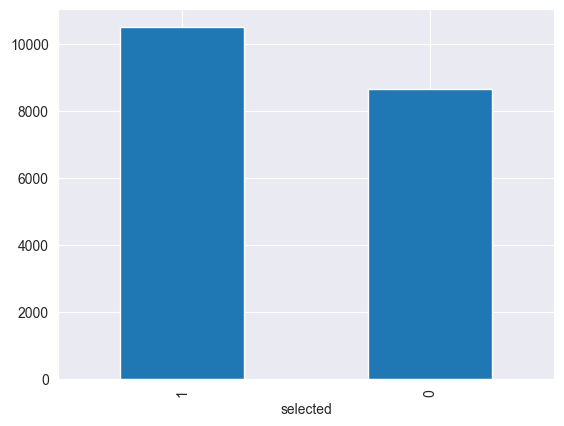

In [105]:
data_train['selected'].value_counts().plot(kind='bar')
data_train['selected'].value_counts()

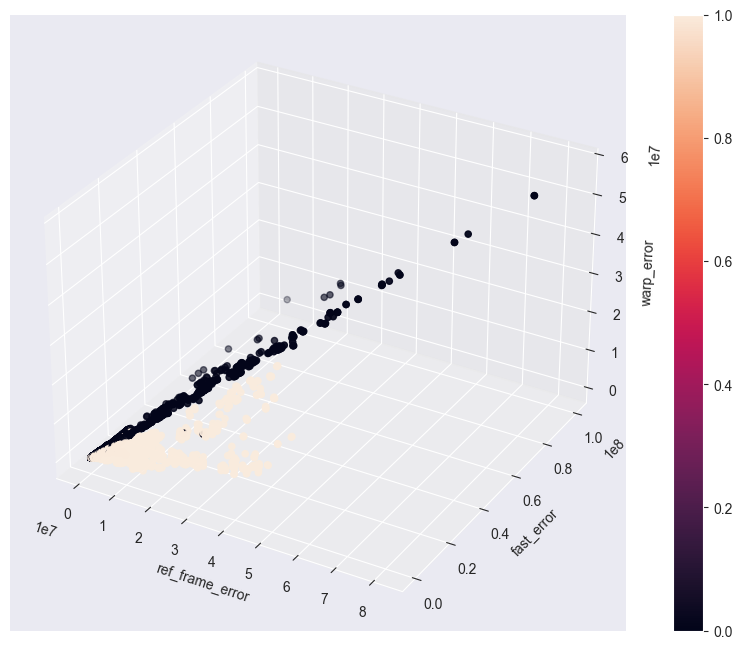

In [106]:
fig = plt.figure(figsize=(12, 8), dpi=100)
ax = fig.add_subplot(111, projection='3d')
pnt3d = ax.scatter3D(data_train['ref_frame_error'], data_train['fast_error'], data_train['warp_error'],
                     c=data_train['selected'])
cbar = plt.colorbar(pnt3d)
ax.set_xlabel('ref_frame_error')
ax.set_ylabel('fast_error')
ax.set_zlabel('warp_error')
plt.show()

<Axes: xlabel='src_height'>

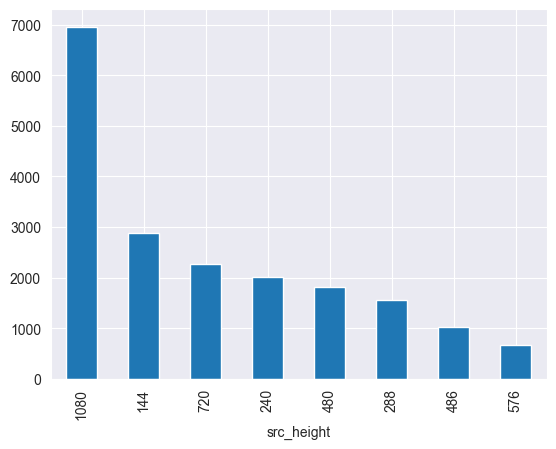

In [107]:
data_train['src_height'].value_counts().plot(kind='bar')

<Axes: xlabel='src_height'>

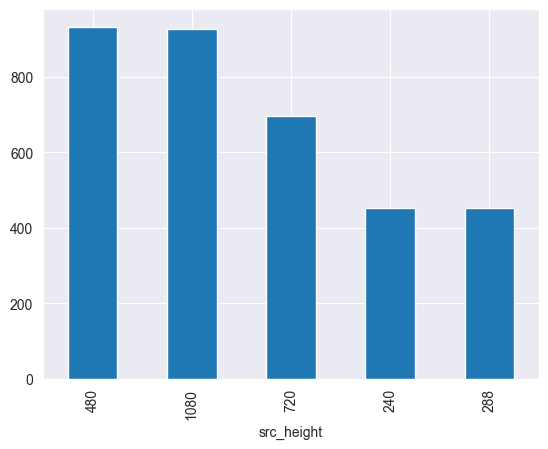

In [108]:
data_test['src_height'].value_counts().plot(kind='bar')

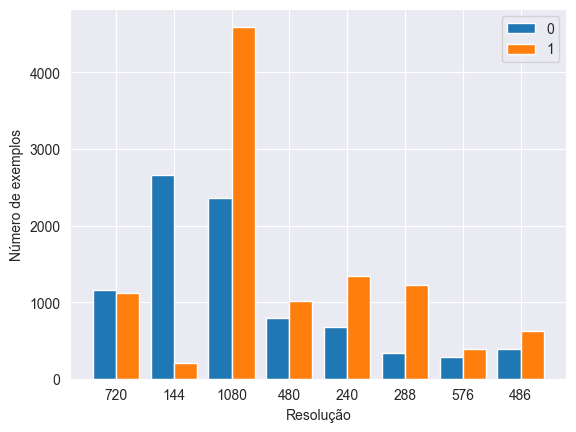

In [109]:
m_data = data_train

resolutions = m_data['src_height'].drop_duplicates()

lst_0 = []
lst_1 = []

for res in resolutions:
    data_res = m_data[(m_data['src_height'] == res)]
    values = data_res['selected'].value_counts()
    lst_0.append(values[0])
    lst_1.append(values[1])

X_axis = np.arange(len(resolutions))

plt.bar(X_axis - 0.2, lst_0, 0.4, label = '0')
plt.bar(X_axis + 0.2, lst_1, 0.4, label = '1')

plt.xticks(X_axis, resolutions)
plt.xlabel("Resolução")
plt.ylabel("Número de exemplos")
plt.legend()
plt.show()